In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('Fiscalextraction.csv')
df

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Microsoft,2023,211915,72361,411976,205753,2706
1,Microsoft,2022,198270,72738,364840,198298,2368
2,Microsoft,2021,168088,61271,333779,191791,2052
3,Tesla,2023,"96,77","14,974","106,618",3777,13256
4,Tesla,2022,"81,462",12556,82338,2215,14724
5,Tesla,2021,"53,823",5664,"62,131",3372,11497
6,Apple,2023,383285,96995,352583,290437,110543
7,Apple,2022,394328,99803,352755,302083,122151
8,Apple,2021,365817,94680,351002,287912,104038


In [4]:
# Convert your financial columns to numeric types
cols_to_convert = ['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Cash Flow from Operating Activities']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [5]:
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change(fill_method=None) * 100 ## Calculate Revenue Growth % grouped by company
# Apple and Microsoft show steady growth.
# Tesla's % growth tends to be larger due to its smaller base revenue.

In [6]:
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change(fill_method=None) * 100
df  #Apple's net income levels are higher, suggesting stronger profitability margins compared to Tesla.

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%)
0,Microsoft,2023,211915.0,72361.0,411976.0,205753,2706,NaN,NaN
1,Microsoft,2022,198270.0,72738.0,364840.0,198298,2368,-6.438902,0.520999
2,Microsoft,2021,168088.0,61271.0,333779.0,191791,2052,-15.222676,-15.764800
3,Tesla,2023,NaN,NaN,NaN,3777,13256,NaN,NaN
4,Tesla,2022,NaN,12556.0,82338.0,2215,14724,NaN,NaN
5,Tesla,2021,NaN,5664.0,NaN,3372,11497,NaN,-54.890092
6,Apple,2023,383285.0,96995.0,352583.0,290437,110543,NaN,NaN
7,Apple,2022,394328.0,99803.0,352755.0,302083,122151,2.881146,2.894995
8,Apple,2021,365817.0,94680.0,351002.0,287912,104038,-7.230275,-5.133112


In [7]:
df['Normalized Revenue'] = df.groupby('Company')['Total Revenue'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)


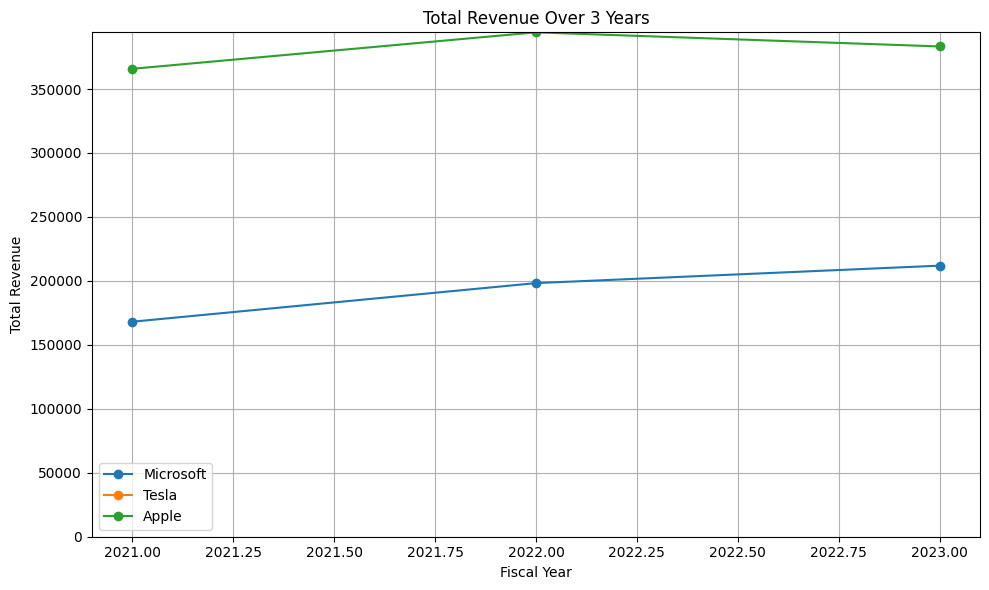

In [8]:
plt.figure(figsize=(10,6))

for company in df['Company'].unique():
    company_df = df[df['Company'] == company]
    plt.plot(company_df['Fiscal Year'], company_df['Total Revenue'], marker='o', label=company)

plt.title('Total Revenue Over 3 Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)

# Adjust Y-axis limits (e.g., start at 0, end at a custom value)
plt.ylim(0, df['Total Revenue'].max() )  # Adding 20% padding on top

plt.tight_layout()
plt.show()


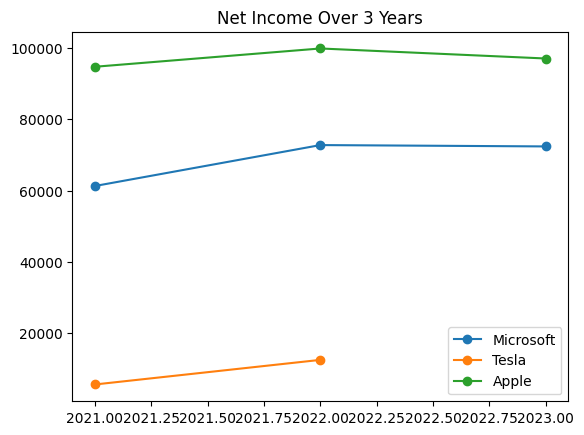

In [9]:
for company in df['Company'].unique():
    company_df = df[df['Company'] == company]
    plt.plot(company_df['Fiscal Year'], company_df['Net Income'], marker='o', label=company)

plt.title('Net Income Over 3 Years')
plt.legend()
plt.show()
#Tesla's revenue looks flat because it's smaller than Apple/Microsoft in absolute terms.
# Consider normalizing revenue for better comparison in a future plot.


In [10]:
df1= df['Debt to Asset Ratio'] = df['Total Liabilities'] / df['Total Assets']
#Tesla appears more leveraged based on this ratio; Microsoft and Apple show more conservative balance sheets.



In [11]:
def calc_cagr(start, end, periods):
    return ((end / start) ** (1 / periods) - 1) * 100

for company in df['Company'].unique():
    company_df = df[df['Company'] == company].sort_values('Fiscal Year')
    cagr = calc_cagr(company_df.iloc[0]['Total Revenue'], company_df.iloc[-1]['Total Revenue'], 2)
    print(f"{company} Revenue CAGR: {cagr:.2f}%")


Microsoft Revenue CAGR: 12.28%
Tesla Revenue CAGR: nan%
Apple Revenue CAGR: 2.36%


In [12]:
print(df[['Total Revenue', 'Net Income', 'Cash Flow from Operating Activities', 'Total Liabilities']].corr())


                                     Total Revenue  Net Income  \
Total Revenue                             1.000000    0.990365   
Net Income                                0.990365    1.000000   
Cash Flow from Operating Activities       0.990816    0.678218   
Total Liabilities                         0.997378    0.996013   

                                     Cash Flow from Operating Activities  \
Total Revenue                                                   0.990816   
Net Income                                                      0.678218   
Cash Flow from Operating Activities                             1.000000   
Total Liabilities                                               0.688636   

                                     Total Liabilities  
Total Revenue                                 0.997378  
Net Income                                    0.996013  
Cash Flow from Operating Activities           0.688636  
Total Liabilities                             1.000000  
